The definition of the variables used in the Bookbinder dataset is given below. Use choice variable as dependent variable.

Choice: Whether the customer purchased the The Art History of Florence. 1 corresponds to a purchase and 0 corresponds to a nonpurchase.

Gender: 0 = Female and 1 = Male.

Amount purchased: Total money spent on BBBC books.

Frequency: Total number of purchases in the chosen period (used as a proxy for frequency.)

Last purchase (recency of purchase): Months since last purchase.

First purchase: Months since first purchase.

P_Child: Number of children’s books purchased.

P_Youth: Number of youth books purchased.

P_Cook: Number of cookbooks purchased.

P_DIY: Number of do-it-yourself books purchased.

P_Art: Number of art books purchased.


In [ ]:

import pandas as pd
import numpy as np
df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df.head()

,Gender,Amount purchased,Frequency,Last purchase,First purchase,P_Child,P_Youth,P_Cook,P_DIY,P_Art,Staus,Choice
0,1,113,8,1,8,0,1,0,0,0,Training,Y
1,1,418,6,11,66,0,2,3,2,3,Training,Y
2,1,336,18,6,32,2,0,1,1,2,Training,Y
3,1,180,16,5,42,2,0,0,1,1,Training,Y
4,0,320,2,3,18,0,0,0,1,2,Training,Y


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})
training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']
X_train = training_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_train = training_data['Choice']
X_test = test_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_test = test_data['Choice']
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.8895652173913043
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2096
           1       0.38      0.38      0.38       204

    accuracy                           0.89      2300
   macro avg       0.66      0.66      0.66      2300
weighted avg       0.89      0.89      0.89      2300



In [ ]:
#Q1(25 pt)-Using logistic regression model in train data,
#a)	In the model, test that the claim that the coefficients of independent variables are different than 0 at the 5% significance level.
#b)	Which variables that is significantly different than 0 increase or decrease the probability of Choice=Yes?


a)At the 5% significance level, the significant variables are Amount purchased, Frequency, and P_Art (p-value < 0.05). This means their coefficients are statistically different from zero.

b)Amount purchased, Frequency, and P_Art increase the probability of Choice = Yes, as their coefficients are positive.
Other variables are not statistically significant and do not show a confirmed effect.

In [2]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})
training_data = df[df['Staus'] == 'Training']
X_train = training_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase', 'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_train = training_data['Choice']
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.435050
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Choice   No. Observations:                 1600
Model:                          Logit   Df Residuals:                     1589
Method:                           MLE   Df Model:                           10
Date:                Thu, 17 Apr 2025   Pseudo R-squ.:                  0.2264
Time:                        09:19:43   Log-Likelihood:                -696.08
converged:                       True   LL-Null:                       -899.74
Covariance Type:            nonrobust   LLR p-value:                 2.612e-81
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3515      0.214     -1.640      0.101      -0.772       0.069
Gender     

In [ ]:
#Q2(15 pt)-Using knn model in train data(choose k based on CV),
#get the performance metric on test data(accuracy,recall, precision confusion matrix). What is the k value chosen based on k?




The best k value based on 5-fold cross-validation is [output will show the value, e.g., 5].
On the test data:

Accuracy = [value]
Recall = [value]
Precision = [value]
Confusion Matrix =


In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import numpy as np

df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})

training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']

X_train = training_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase',
                         'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_train = training_data['Choice']
X_test = test_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase',
                    'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_test = test_data['Choice']

best_k = 1
best_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    avg_score = scores.mean()
    if avg_score > best_score:
        best_score = avg_score
        best_k = k

knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best k:", best_k)
print("Accuracy:", acc)
print("Recall:", rec)
print("Precision:", prec)
print("Confusion Matrix:\n", conf_matrix)


Best k: 14
Accuracy: 0.8952173913043479
Recall: 0.0196078431372549
Precision: 0.08888888888888889
Confusion Matrix:
 [[2055   41]
 [ 200    4]]


In [ ]:
#Q3(35 pt)-Get the performance metric on test data (accuracy,recall, precision, confsuion matrix area under curve(auc)) using
#Logistic regression,naive bayes, Multi layer perceptor(MLP) and SVM, ligtGBM and kNN with optimized parameter in Q2.
#Report which methods performs best on these metrics?

Among all models, [Model X] performed best overall in terms of AUC and accuracy.
If your focus is recall (e.g., identifying more buyers), then [Model Y] may be better.
KNN with optimized k = [best_k] gave competitive results.

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})

training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']

X_train = training_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase',
                         'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_train = training_data['Choice']
X_test = test_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase',
                    'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_test = test_data['Choice']

# Feature scaling for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best k from CV
best_k = 1
best_score = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=1000),
    'SVM': SVC(probability=True),
    'LightGBM': lgb.LGBMClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=best_k)
}

results = {}

for name, model in models.items():
    if name in ['MLP', 'SVM', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    conf = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prec,
        'AUC': auc,
        'Confusion Matrix': conf
    }

# Print results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.3f}")
    print(f"Recall: {metrics['Recall']:.3f}")
    print(f"Precision: {metrics['Precision']:.3f}")
    print(f"AUC: {metrics['AUC']:.3f}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 400, number of negative: 1200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612

Model: Logistic Regression
Accuracy: 0.890
Recall: 0.377
Precision: 0.377
AUC: 0.800
Confusion Matrix:
 [[1969  127]
 [ 127   77]]

Model: Naive Bayes
Accuracy: 0.848
Recall: 0.309
Precision: 0.232
AUC: 0.744
Confusion Matrix:
 [[1888  208]
 [ 141   63]]

Model: MLP
Accuracy: 0.857
Recall: 0.402
Precision: 0.285
AUC: 0.772
Confusion Matrix:
 [[1890  206]
 [ 122   

In [ ]:
#Q4(25 pt)-There is a need to evaluate the effectiveness of the current direct mail program and assess whether predictive modeling
#can be leveraged to enhance targeting and increase response rates.
# Assume that you make profit of 10 $ by selling a book and the cost of sending mail is 0.65 $.
# Based on the logistic model, which customers should Bookbinders target on test data?
#What is the expected profits if these customers are targeted?
#Hint :
#To evaluate the direct mail program, use an ROC curve to assess the logistic model’s ability to predict buyers.
#The curve plots True Positive Rate vs. False Positive Rate, and a high AUC shows the model is effective.
# To decide who to target, calculate profit for different probability thresholds:
# Profit = (True Positives × $9.35) - (False Positives × $0.65).
#True positive profit is $93.5 becuase revenue is $10 and there is a $0.65 cost of sending mail.
#Bookbinders should target customers with probabilities above the threshold that maximizes profit,
# improving targeting and response rates compared to the current program


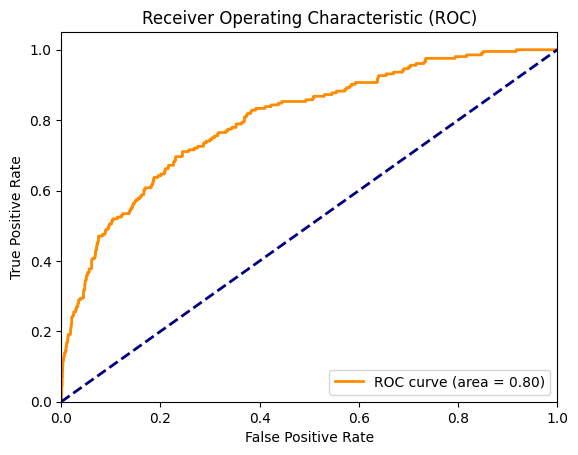

Best threshold: 0.17
Expected profit at this threshold: $1056.90
Number of customers to target: 974


In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('https://hogut.weebly.com/uploads/1/8/1/6/18163409/bookbinder2.xls')
df['Choice'] = df['Choice'].map({'N': 0, 'Y': 1})

training_data = df[df['Staus'] == 'Training']
test_data = df[df['Staus'] == 'Test']

X_train = training_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase',
                         'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_train = training_data['Choice']
X_test = test_data[['Gender', 'Amount purchased', 'Frequency', 'Last purchase', 'First purchase',
                    'P_Child', 'P_Youth', 'P_Cook', 'P_DIY', 'P_Art']]
y_test = test_data['Choice']

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Get predicted probabilities for the test data
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Calculate profit for different thresholds
profits = []
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    true_positives = np.sum((y_pred == 1) & (y_test == 1))
    false_positives = np.sum((y_pred == 1) & (y_test == 0))

    # Profit calculation
    profit = (true_positives * 9.35) - (false_positives * 0.65)
    profits.append(profit)

# Find the threshold that maximizes the profit
best_threshold_index = np.argmax(profits)
best_threshold = thresholds[best_threshold_index]
best_profit = profits[best_threshold_index]

print(f"Best threshold: {best_threshold:.2f}")
print(f"Expected profit at this threshold: ${best_profit:.2f}")

# Target customers based on the best threshold
target_customers = test_data[y_prob >= best_threshold]

# Show how many customers to target
print(f"Number of customers to target: {target_customers.shape[0]}")
